In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


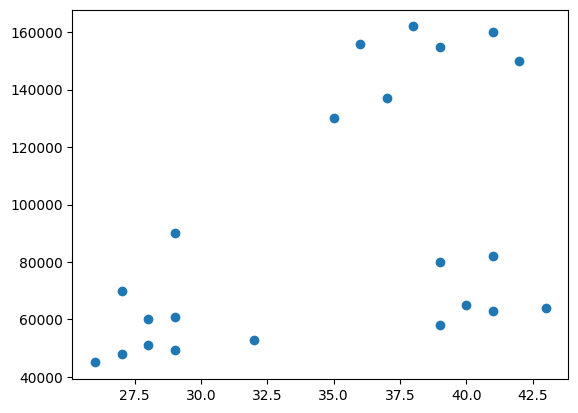

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [10]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

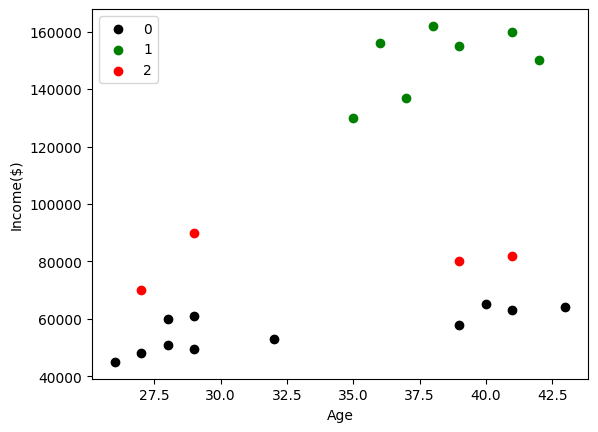

In [14]:
plt1 = plt.scatter(df1.Age,df1['Income($)'],color = 'black')
plt2 = plt.scatter(df2.Age,df2['Income($)'],color = 'green')
plt3 = plt.scatter(df3.Age,df3['Income($)'],color = 'red')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend([plt1,plt2,plt3],['0','1','2'])

This is happening because our scalling is not done rightly. Do some preprocessing

In [22]:
Income = df['Income($)']
Age = df['Age']
Income = np.array(Income)
Age = np.array(Age)
Income = Income.reshape(-1,1)
Age = Age.reshape(-1,1)

In [20]:
scaler = MinMaxScaler()
scaler.fit(Income)
df['Income($)'] = scaler.transform(Income)
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [23]:
scaler.fit(Age)
df['Age'] = scaler.transform(Age)
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [17]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [25]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(Age,Income)
y_predict

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1])

In [27]:
df['Cluster'] = y_predict

In [28]:
df.head()

,Name,Age,Income($),cluster,Cluster
0,Rob,0.058824,0.213675,2,2
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,2
3,Ismail,0.117647,0.128205,0,2
4,Kory,0.941176,0.897436,1,1


In [29]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

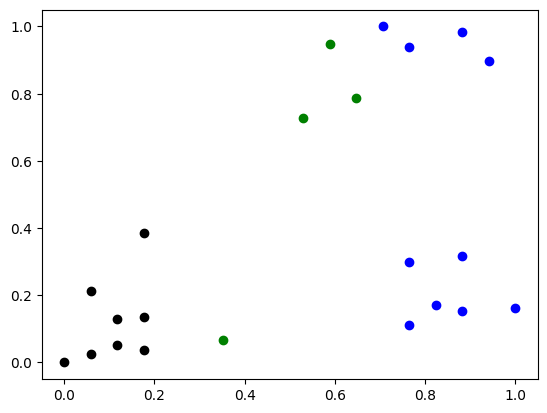

In [30]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

In [31]:
km.cluster_centers_

array([[35.   ],
       [40.3  ],
       [27.875]])

In [32]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])

In [33]:
df['Cluster4'] = y_predict

In [34]:
df.head()

,Name,Age,Income($),cluster,Cluster,Cluster4
0,Rob,0.058824,0.213675,2,2,1
1,Michael,0.176471,0.384615,2,2,1
2,Mohan,0.176471,0.136752,0,2,1
3,Ismail,0.117647,0.128205,0,2,1
4,Kory,0.941176,0.897436,1,1,0


In [35]:
df1 = df[df['Cluster4']==0]
df2 = df[df['Cluster4']==1]
df3 = df[df['Cluster4']==2]


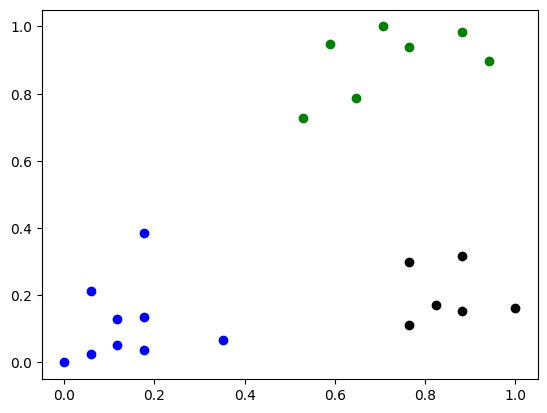

In [36]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

In [37]:
df.head()

,Name,Age,Income($),cluster,Cluster,Cluster4
0,Rob,0.058824,0.213675,2,2,1
1,Michael,0.176471,0.384615,2,2,1
2,Mohan,0.176471,0.136752,0,2,1
3,Ismail,0.117647,0.128205,0,2,1
4,Kory,0.941176,0.897436,1,1,0


In [43]:
df = df.drop('Cluster',axis=1)

In [44]:
df.head()

,Name,Age,Income($),Cluster4
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0


In [45]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

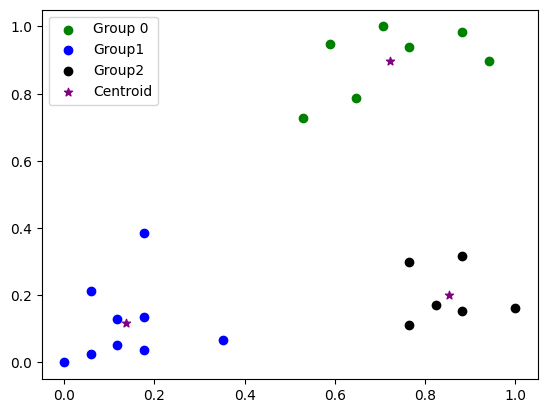

In [48]:
p1 = plt.scatter(df1['Age'],df1['Income($)'],color='green')
p2 = plt.scatter(df2['Age'],df2['Income($)'],color='blue')
p3 =plt.scatter(df3['Age'],df3['Income($)'],color='black')
p4 = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend([p1,p2,p3,p4],['Group 0','Group1','Group2','Centroid'])

### Elbow Plot

In [49]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # inertia_ is  the SSE = sum of square error
sse

[4.815803096810713,
 1.963523619926113,
 0.3591464356000187,
 0.23317279518666567,
 0.19120312759223831,
 0.13505641005419197,
 0.09912548596634599,
 0.08302391829437637,
 0.058955392584470155]

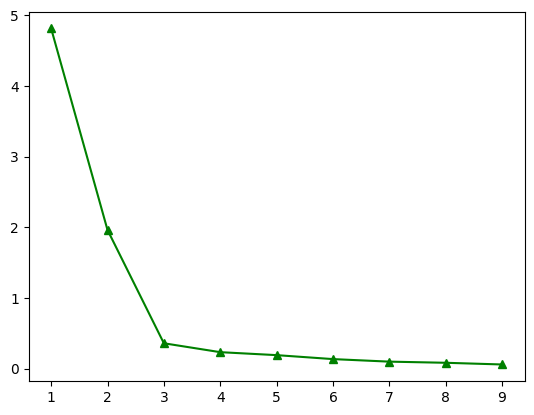

In [50]:
x = np.arange(1,10)
plt.plot(x,sse,color="green",marker="^")

### Good Analysis